# **Build CNN model for classification of flowers**

# **1. Download the Dataset [dataset](https://drive.google.com/file/d/1xkynpL15pt6KT3YSlDimu4A5iRU9qYck/view)**

In [ ]:
from google.colab import drive
drive.mount('/content/gokul')

Mounted at /content/drive


In [1]:
!unzip "/content/assignment3/flowers-dataset.zip"

unzip:  cannot find or open /content/drive/MyDrive/Colab Notebooks/muthamizhan/Flowers-Dataset.zip, /content/drive/MyDrive/Colab Notebooks/muthamizhan/Flowers-Dataset.zip.zip or /content/drive/MyDrive/Colab Notebooks/muthamizhan/Flowers-Dataset.zip.ZIP.


 # **2. Image Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

x_train = train_datagen.flow_from_directory(r"/content/flowers", target_size = (64,64) , class_mode = "categorical", batch_size = 100)

Found 4317 images belonging to 5 classes.


In [ ]:
#test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#x_test = test_datagen.flow_from_directory(r"/content/flowers/flower_photos/test", target_size = (64,64), class_mode = "categorical", batch_size = 100)
#valid = test_datagen.flow_from_directory(r"/content/flowers/flower_photos/validation", target_size= (64,64), class_mode = "categorical", batch_size = 100 )


# **3. Model Building and also Split dataset into training and testing sets**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

model = Sequential()

# **4. Add the layers (Convolution, MaxPooling, Flatten, Dense-(HiddenLayers), Output)**

In [ ]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu")) #multiple dense layers
model.add(Dense(5, activation = "softmax")) #output layer

# **5. Compile The Model**

In [ ]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")
len(x_train)

44

In [ ]:
#model.fit(x_train, epochs = 15, validation_data = x_test, steps_per_epoch = len(x_train), validation_steps = len(x_test))

model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))

Epoch 1/15
44/44 [==============================] - 29s 624ms/step - loss: 1.9805 - accuracy: 0.3438
Epoch 2/15
44/44 [==============================] - 28s 629ms/step - loss: 1.1597 - accuracy: 0.5166
Epoch 3/15
44/44 [==============================] - 28s 624ms/step - loss: 1.0943 - accuracy: 0.5490
Epoch 4/15
44/44 [==============================] - 28s 626ms/step - loss: 1.0351 - accuracy: 0.5773
Epoch 5/15
44/44 [==============================] - 28s 628ms/step - loss: 1.0011 - accuracy: 0.6060
Epoch 6/15
44/44 [==============================] - 28s 621ms/step - loss: 0.9402 - accuracy: 0.6312
Epoch 7/15
44/44 [==============================] - 28s 626ms/step - loss: 0.9231 - accuracy: 0.6430
Epoch 8/15
44/44 [==============================] - 28s 623ms/step - loss: 0.8855 - accuracy: 0.6516
Epoch 9/15
44/44 [==============================] - 27s 619ms/step - loss: 0.8676 - accuracy: 0.6616
Epoch 10/15
44/44 [==============================] - 28s 621ms/step - loss: 0.8447 - accura

# **6. Fit The Model**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 5)                 755       
                                                        

# **7. Save The Model**

In [ ]:
model.save("flowers.h5")

# **8. Test The Model**

Input Image is



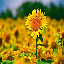

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model = load_model("/content/flowers.h5")
img = image.load_img("/content/flower.jpeg", target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = model.predict(x)

labels = ['daisy','dandelion','roses','sunflowers','tulips']
print("Input Image is\n")
img

In [ ]:
print("Classification of Flower is:",labels[np.argmax(pred)])

Classification of Flower is: sunflowers
